## Exploración de datos

In [1]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

In [2]:
data = pandas.read_csv('insurance.csv')
print(data.head())
print(data.info())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB
None


Como se puede ver, no hay datos nulos

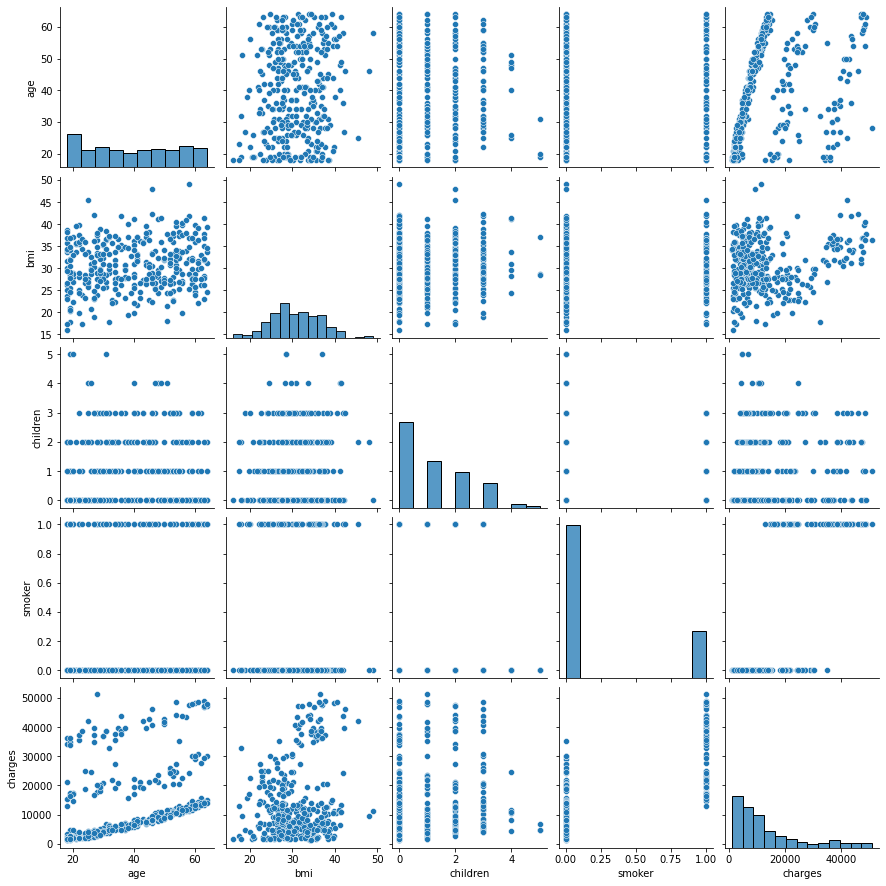

In [3]:
seaborn.pairplot(data[['age','bmi','children','smoker','charges']])

(array([86.,  0.,  0., 85.,  0.,  0., 95.,  0.,  0., 82.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

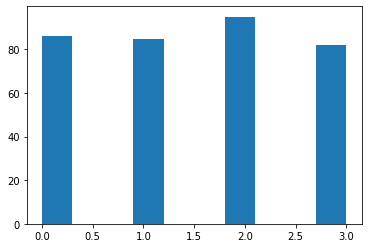

In [4]:
plt.hist(data.region)

(array([59., 31., 36., 30., 26., 30., 33., 31., 38., 34.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

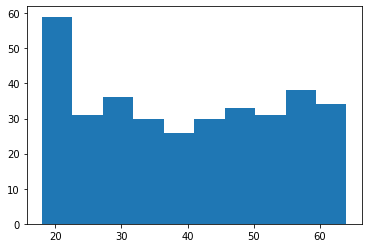

In [5]:
plt.hist(data.age)

# Preparación de los datos - datos categóricos

In [6]:
ohc = preprocessing.OneHotEncoder()
le = preprocessing.LabelEncoder()
le.fit(data['sex'])
le.fit(data['smoker'])
ohc.fit(data[['region']])

OneHotEncoder()

# Dividir en training y test

In [7]:
charges = data['charges']
data = data[['bmi']]
X_train, X_test, y_train, y_test = train_test_split(data, charges, test_size=0.33)

# Preparación de los datos - escala

In [8]:
scaler = preprocessing.StandardScaler()
scaler.fit(data)

StandardScaler()

# Modelación lineal

In [9]:
x_mean = numpy.mean(X_train.values)
y_mean = numpy.mean(y_train.values)

n = len(X_train.values)

numerator = 0
denominator = 0

for i in range(n):
    numerator += (X_train.values[i] - x_mean) * (y_train.values[i] - y_mean)
    denominator += (X_train.values[i] - x_mean) ** 2
    m = numerator / denominator
    c = y_mean - (m * x_mean)

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

# Evaluación de los modelos

In [10]:
print("Coeficientes: ", m, c)
rmse = 0
for i in range(n):
    y_pred = c + m * X_train.values[i]
    rmse += (y_train.values[i] - y_pred) ** 2
rmse = numpy.sqrt(rmse/n)
rmse

Coeficientes:  [463.15452421] [-97.6803943]


array([12201.52369296])

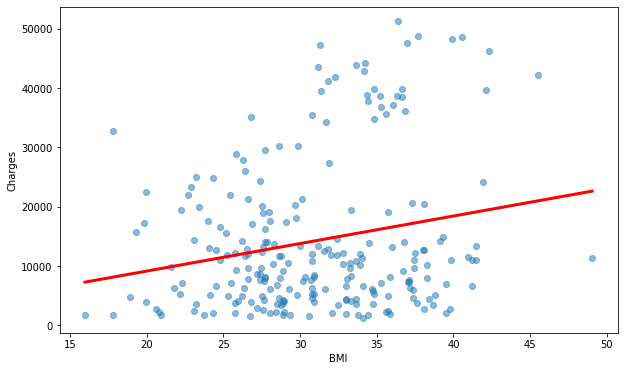

In [11]:
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = c + m * X_train.values[i]
    ss_tot += (y_train.values[i] - y_mean) ** 2
    ss_res += (y_train.values[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)

max_x = numpy.max(X_train.values)
min_x = numpy.min(X_train.values)
 
x = numpy.linspace(min_x, max_x, 1000)
y = c + m * x

plt.figure(figsize=(10,6))
plt.plot(x, y, color='red', linewidth=3)
plt.scatter(X_train.values, y_train.values,  alpha=0.5)
 
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

### Linear Regression

In [12]:
regression.coef_

array([463.15452421])

In [13]:
mean_absolute_error(regression.predict(X_test), y_test)

10325.24183016483

In [14]:
mean_squared_error(regression.predict(X_test), y_test)

159131869.96154606

In [15]:
r2_score(regression.predict(X_test), y_test)

-25.054312026743904

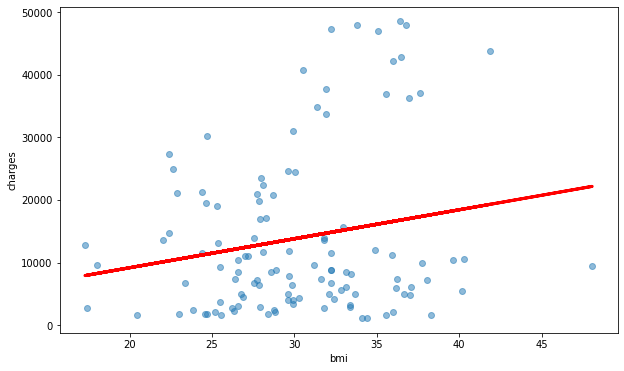

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, regression.predict(X_test), color='red', linewidth=3)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

# Regresión Polinomial

159539543.8842082
-24.955803386099866


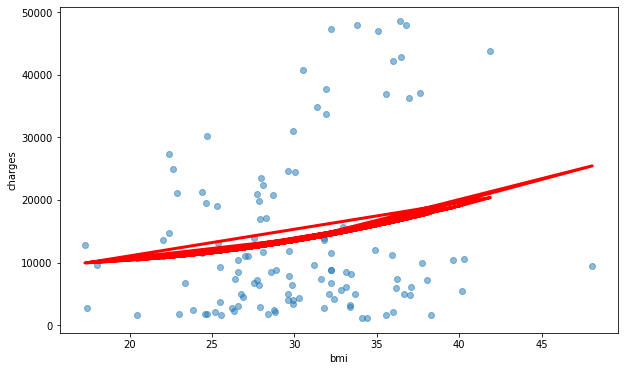

In [17]:
poly = PolynomialFeatures()
poly_train = poly.fit_transform(X_train)
poly_test = poly.fit_transform(X_test)
pl = LinearRegression()
pl.fit(poly_train, y_train)
print(mean_squared_error(pl.predict(poly_test), y_test))
print(r2_score(pl.predict(poly_test), y_test))
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, pl.predict(poly_test), '-r', linewidth=3)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()